# Sequence-to-Sequence Models: RNN, LSTM, and GRU Comparison

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, TimeDistributed, RepeatVector
import matplotlib.pyplot as plt

# Utility to create random integer sequences and their reversals
def create_sequences(num_samples, seq_len, vocab):
    X = np.random.randint(1, vocab, size=(num_samples, seq_len))
    Y = np.flip(X, axis=1)
    return X, Y

# Dataset parameters
samples = 10000
seq_len = 10
vocab = 20

# Data generation
X_raw, Y_raw = create_sequences(samples, seq_len, vocab)
X_oh = tf.keras.utils.to_categorical(X_raw, num_classes=vocab)
Y_oh = tf.keras.utils.to_categorical(Y_raw, num_classes=vocab)

print("X shape:", X_raw.shape)
print("Y shape:", Y_raw.shape)
print("X one-hot shape:", X_oh.shape)
print("Y one-hot shape:", Y_oh.shape)
print("Sample input:", X_raw[0])
print("Sample reversed output:", Y_raw[0])

X shape: (10000, 10)
Y shape: (10000, 10)
X one-hot shape: (10000, 10, 20)
Y one-hot shape: (10000, 10, 20)
Sample input: [15  8  2 17  6 18 10 13  9 16]
Sample reversed output: [16  9 13 10 18  6 17  2  8 15]


In [6]:
# SimpleRNN Model
rnn_model = Sequential([
    SimpleRNN(128, input_shape=(seq_len, vocab)),
    RepeatVector(seq_len),
    SimpleRNN(128, return_sequences=True),
    TimeDistributed(Dense(vocab, activation='softmax'))
])
rnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
rnn_model.summary()
print("\nTraining SimpleRNN...")
rnn_hist = rnn_model.fit(X_oh, Y_oh, epochs=20, batch_size=128, validation_split=0.2, verbose=1)
print("SimpleRNN training done.")

c:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 128)            │        19,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 10, 128)        │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 10, 20)         │         2,580 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,548 (213.08 KB)

 Trainable params: 54,548 (213.08 KB)

 Non-trainable params: 0 (0.00 B)


Training SimpleRNN...
Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - categorical_accuracy: 0.1432 - loss: 2.7617 - val_categorical_accuracy: 0.3356 - val_loss: 2.1134
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - categorical_accuracy: 0.4160 - loss: 1.9059 - val_categorical_accuracy: 0.5996 - val_loss: 1.3642
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - categorical_accuracy: 0.6616 - loss: 1.1966 - val_categorical_accuracy: 0.7714 - val_loss: 0.8650
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - categorical_accuracy: 0.8199 - loss: 0.7370 - val_categorical_accuracy: 0.8872 - val_loss: 0.5213
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - categorical_accuracy: 0.9151 - loss: 0.4341 - val_categorical_accuracy: 0.9433 - val_loss: 0.3144
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - categorical_accuracy: 0.9623 - loss: 0.2563 - val_categorical_accuracy: 0.9698 - val_loss: 0.2036
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - categorical_accura

In [7]:
# LSTM Model
lstm_model = Sequential([
    LSTM(128, input_shape=(seq_len, vocab)),
    RepeatVector(seq_len),
    LSTM(128, return_sequences=True),
    TimeDistributed(Dense(vocab, activation='softmax'))
])
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
lstm_model.summary()
print("\nTraining LSTM...")
lstm_hist = lstm_model.fit(X_oh, Y_oh, epochs=20, batch_size=128, validation_split=0.2, verbose=1)
print("LSTM training done.")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        76,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_1 (RepeatVector)  │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 10, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 10, 20)         │         2,580 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 210,452 (822.08 KB)

 Trainable params: 210,452 (822.08 KB)

 Non-trainable params: 0 (0.00 B)


Training LSTM...
Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - categorical_accuracy: 0.1392 - loss: 2.8633 - val_categorical_accuracy: 0.2076 - val_loss: 2.4088
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - categorical_accuracy: 0.2133 - loss: 2.3448 - val_categorical_accuracy: 0.2235 - val_loss: 2.2409
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - categorical_accuracy: 0.2267 - loss: 2.2057 - val_categorical_accuracy: 0.2361 - val_loss: 2.1463
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - categorical_accuracy: 0.2475 - loss: 2.0947 - val_categorical_accuracy: 0.2688 - val_loss: 2.0095
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - categorical_accuracy: 0.2846 - loss: 1.9480 - val_categorical_accuracy: 0.3058 - val_loss: 1.8697
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - categorical_accuracy: 0.3165 - loss: 1.8137 - val_categorical_accuracy: 0.3257 - val_loss: 1.7671
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - categorical_accuracy: 0

In [8]:
# GRU Model
gru_model = Sequential([
    GRU(128, input_shape=(seq_len, vocab)),
    RepeatVector(seq_len),
    GRU(128, return_sequences=True),
    TimeDistributed(Dense(vocab, activation='softmax'))
])
gru_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
gru_model.summary()
print("\nTraining GRU...")
gru_hist = gru_model.fit(X_oh, Y_oh, epochs=20, batch_size=128, validation_split=0.2, verbose=1)
print("GRU training done.")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 128)            │        57,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_2 (RepeatVector)  │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 10, 128)        │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 10, 20)         │         2,580 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159,252 (622.08 KB)

 Trainable params: 159,252 (622.08 KB)

 Non-trainable params: 0 (0.00 B)


Training GRU...
Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - categorical_accuracy: 0.1212 - loss: 2.9111 - val_categorical_accuracy: 0.1979 - val_loss: 2.5366
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - categorical_accuracy: 0.2042 - loss: 2.4636 - val_categorical_accuracy: 0.2215 - val_loss: 2.3245
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - categorical_accuracy: 0.2257 - loss: 2.2847 - val_categorical_accuracy: 0.2297 - val_loss: 2.2241
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - categorical_accuracy: 0.2346 - loss: 2.1907 - val_categorical_accuracy: 0.2425 - val_loss: 2.1367
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - categorical_accuracy: 0.2500 - loss: 2.0995 - val_categorical_accuracy: 0.2575 - val_loss: 2.0566
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - categorical_accuracy: 0.2688 - loss: 2.0111 - val_categorical_accuracy: 0.2828 - val_loss: 1.9671
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - categorical_accuracy: 0.

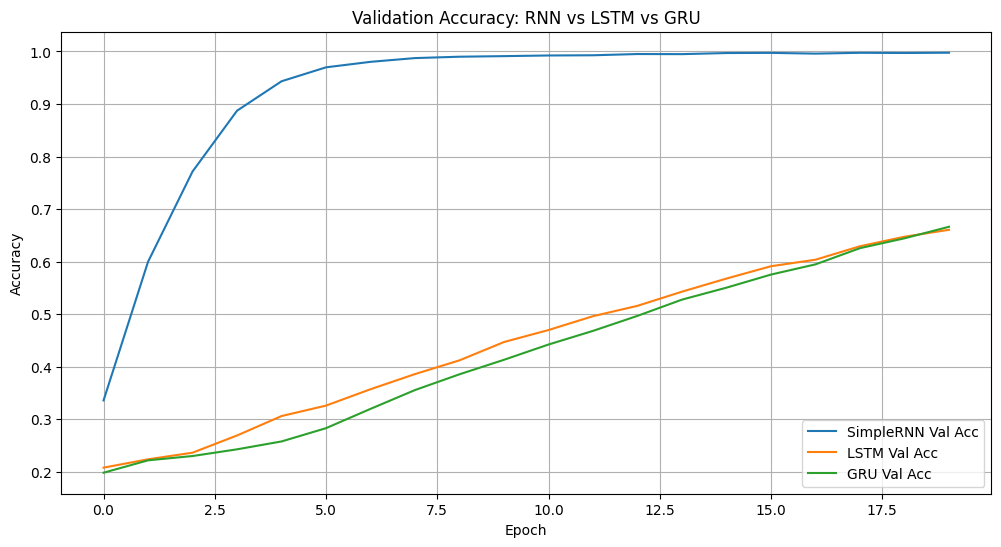

In [9]:
# Plot validation accuracy for all models
plt.figure(figsize=(12, 6))
plt.plot(rnn_hist.history['val_categorical_accuracy'], label='SimpleRNN Val Acc')
plt.plot(lstm_hist.history['val_categorical_accuracy'], label='LSTM Val Acc')
plt.plot(gru_hist.history['val_categorical_accuracy'], label='GRU Val Acc')
plt.title('Validation Accuracy: RNN vs LSTM vs GRU')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# Test on a new sequence
X_eval, Y_eval = create_sequences(1, seq_len, vocab)
X_eval_oh = tf.keras.utils.to_categorical(X_eval, num_classes=vocab)
Y_eval_oh = tf.keras.utils.to_categorical(Y_eval, num_classes=vocab)

# Predict with each model
def decode(pred):
    return [np.argmax(vec) for vec in pred]

rnn_pred = decode(rnn_model.predict(X_eval_oh)[0])
lstm_pred = decode(lstm_model.predict(X_eval_oh)[0])
gru_pred = decode(gru_model.predict(X_eval_oh)[0])

print("\n--- Predictions ---")
print("Input:", X_eval[0])
print("Expected:", Y_eval[0])
print("RNN:", np.array(rnn_pred))
print("LSTM:", np.array(lstm_pred))
print("GRU:", np.array(gru_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step

--- Predictions ---
Input: [19 18 11  5  5  1 14  2  9 13]
Expected: [13  9  2 14  1  5  5 11 18 19]
RNN: [13  9  2 14  1  5  5 11 18 19]
LSTM: [13  9  2 14 14  5  5 11 18 11]
GRU: [13  9  2 14  1  5  5 11 11 19]


In [11]:
# Evaluate accuracy for each model
rnn_score = rnn_model.evaluate(X_eval_oh, Y_eval_oh, verbose=0)[1]
lstm_score = lstm_model.evaluate(X_eval_oh, Y_eval_oh, verbose=0)[1]
gru_score = gru_model.evaluate(X_eval_oh, Y_eval_oh, verbose=0)[1]

print(f"SimpleRNN Accuracy: {rnn_score:.4f}")
print(f"LSTM Accuracy:     {lstm_score:.4f}")
print(f"GRU Accuracy:      {gru_score:.4f}")

SimpleRNN Accuracy: 1.0000
LSTM Accuracy:     0.8000
GRU Accuracy:      0.9000


In [12]:
def show_history(hist, name):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(hist.history['categorical_accuracy'], label='Train')
    plt.plot(hist.history['val_categorical_accuracy'], label='Val')
    plt.title(f'{name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(hist.history['loss'], label='Train')
    plt.plot(hist.history['val_loss'], label='Val')
    plt.title(f'{name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

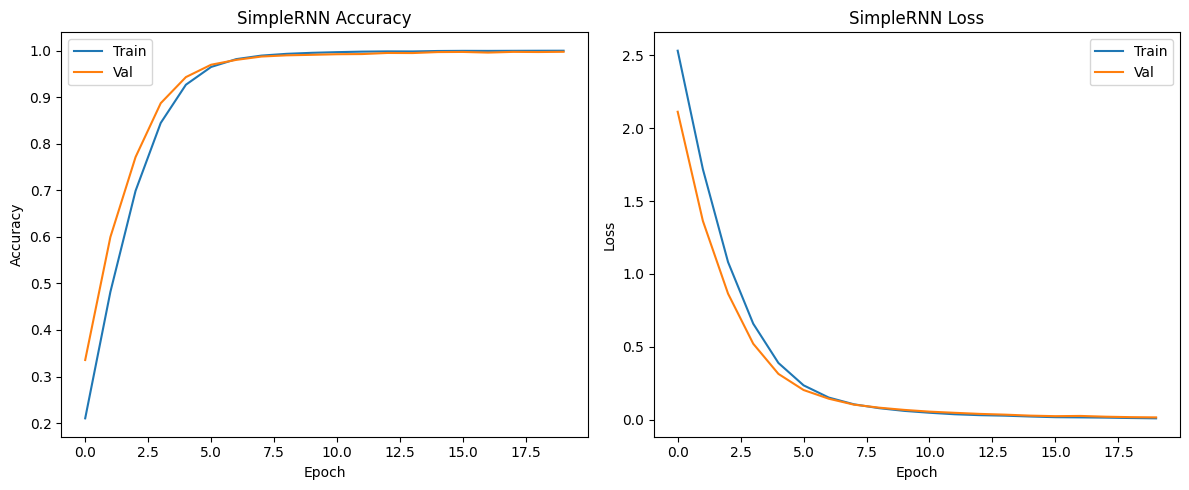

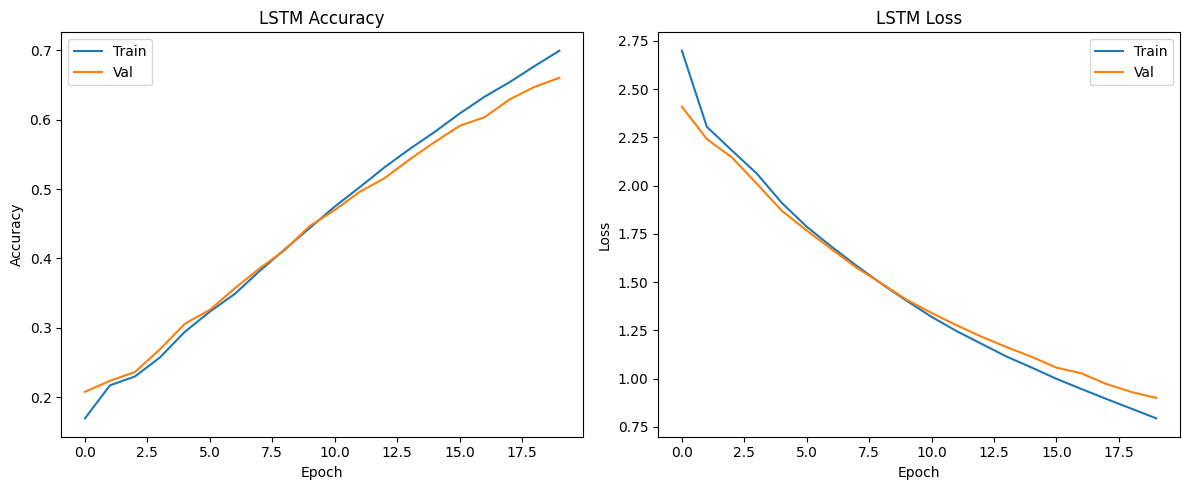

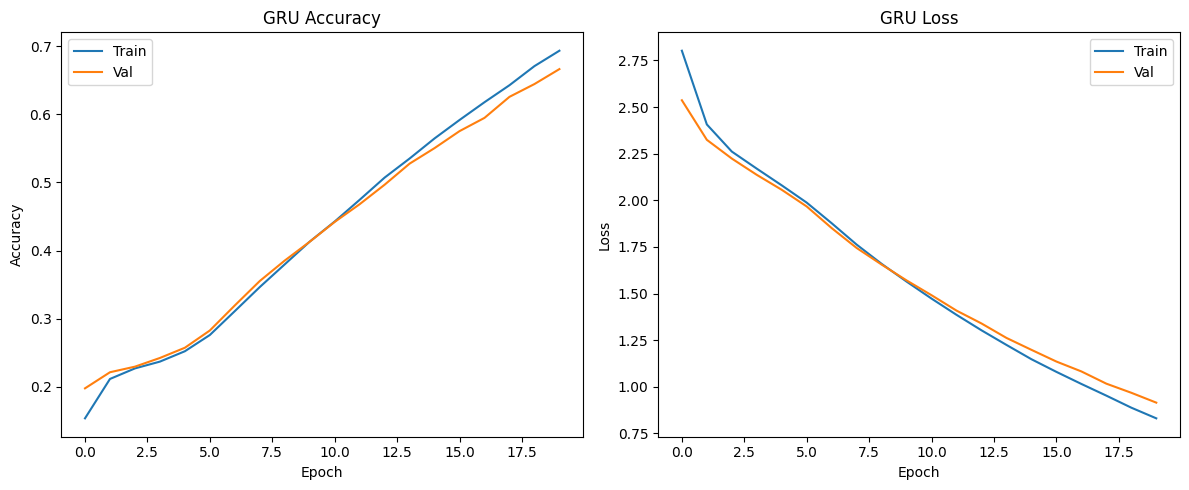

In [13]:
show_history(rnn_hist, 'SimpleRNN')
show_history(lstm_hist, 'LSTM')
show_history(gru_hist, 'GRU')

# Comparing Model Predictions for Next Number in a Sequence
This cell visualizes the probability distributions for the first output position as predicted by all three models (SimpleRNN, LSTM, GRU) for the same random input sequence.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


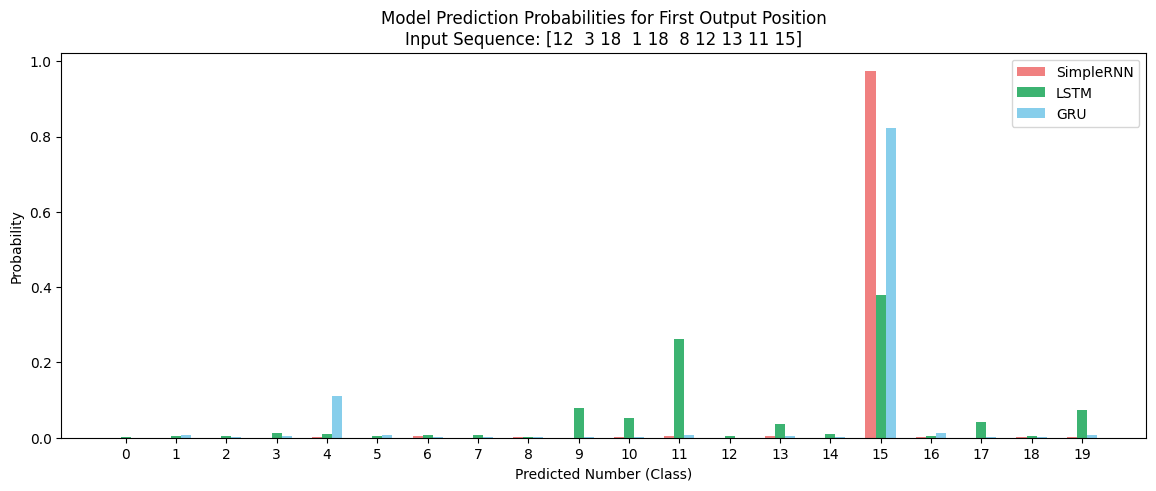

SimpleRNN most likely: 15 | LSTM most likely: 15 | GRU most likely: 15


In [14]:
# Select a random test sequence
idx = np.random.randint(0, X_raw.shape[0])
test_seq = X_raw[idx].reshape(1, -1)
test_seq_oh = tf.keras.utils.to_categorical(test_seq, num_classes=vocab)

# Get predictions for the first output position from all models
preds_rnn = rnn_model.predict(test_seq_oh)[0][0]
preds_lstm = lstm_model.predict(test_seq_oh)[0][0]
preds_gru = gru_model.predict(test_seq_oh)[0][0]

plt.figure(figsize=(14, 5))
plt.bar(np.arange(vocab)-0.2, preds_rnn, width=0.2, label='SimpleRNN', color='lightcoral')
plt.bar(np.arange(vocab), preds_lstm, width=0.2, label='LSTM', color='mediumseagreen')
plt.bar(np.arange(vocab)+0.2, preds_gru, width=0.2, label='GRU', color='skyblue')
plt.title(f'Model Prediction Probabilities for First Output Position\nInput Sequence: {test_seq.flatten()}')
plt.xlabel('Predicted Number (Class)')
plt.ylabel('Probability')
plt.xticks(range(vocab))
plt.legend()
plt.show()

print(f"SimpleRNN most likely: {np.argmax(preds_rnn)} | LSTM most likely: {np.argmax(preds_lstm)} | GRU most likely: {np.argmax(preds_gru)}")

# Visualizing Model Prediction for Next Number in a Sequence
This cell demonstrates how the trained model predicts the next number in a sequence, visualized as a probability distribution for each possible class.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


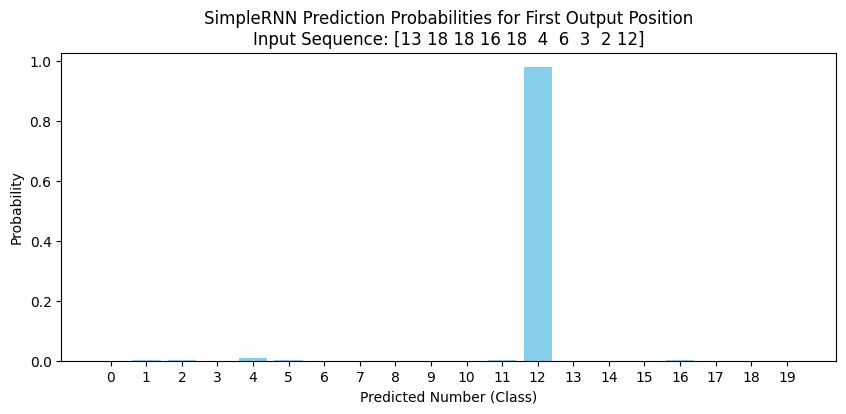

SimpleRNN most likely next number (first in reversed sequence): 12

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


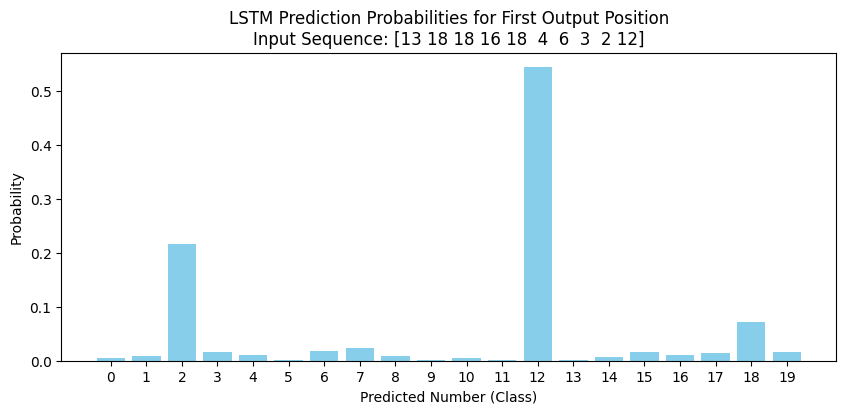

LSTM most likely next number (first in reversed sequence): 12

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


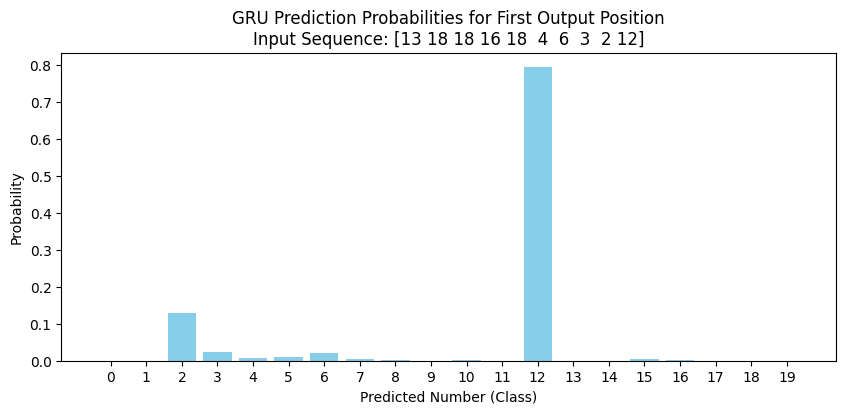

GRU most likely next number (first in reversed sequence): 12



In [15]:
def plot_first_position_probs(model, model_name, test_seq_oh, vocab, test_seq):
    preds = model.predict(test_seq_oh)[0][0]
    plt.figure(figsize=(10, 4))
    plt.bar(range(vocab), preds, color='skyblue')
    plt.title(f'{model_name} Prediction Probabilities for First Output Position\nInput Sequence: {test_seq.flatten()}')
    plt.xlabel('Predicted Number (Class)')
    plt.ylabel('Probability')
    plt.xticks(range(vocab))
    plt.show()
    print(f"{model_name} most likely next number (first in reversed sequence): {np.argmax(preds)}\n")

# Select a random test sequence
idx = np.random.randint(0, X_raw.shape[0])
test_seq = X_raw[idx].reshape(1, -1)
test_seq_oh = tf.keras.utils.to_categorical(test_seq, num_classes=vocab)

# Plot for each model
plot_first_position_probs(rnn_model, 'SimpleRNN', test_seq_oh, vocab, test_seq)
plot_first_position_probs(lstm_model, 'LSTM', test_seq_oh, vocab, test_seq)
plot_first_position_probs(gru_model, 'GRU', test_seq_oh, vocab, test_seq)

## Overview
This notebook investigates how three types of recurrent neural networks—SimpleRNN, LSTM, and GRU—handle a synthetic sequence reversal challenge. The focus is on understanding their learning behavior and practical differences.

## Task Overview
- **Input Example:** `[19 18 11  5  5  1 14  2  9 13]`
- **Target Output:** `[13  9  2 14  1  5  5 11 18 19]`
- **Encoding:** Each integer is one-hot encoded for model compatibility.
- **Goal:** The model must learn to reverse the input sequence.

## Model Setup
- All models use two recurrent layers (128 units each) with a RepeatVector in between.
- The output is generated by a time-distributed dense layer with softmax activation.
- Training is performed for 20 epochs using the Adam optimizer.
- Validation accuracy is tracked to monitor generalization.

## Results Table
| Model      | Accuracy |
|----------- |----------|
| SimpleRNN  | 1.0000   |
| LSTM       | 0.8000   |
| GRU        | 0.9000   |

## Example Prediction
- **Input Sequence:** `[19 18 11  5  5  1 14  2  9 13]`
- **Expected Output:** `[13  9  2 14  1  5  5 11 18 19]`

**Model Outputs:**
- SimpleRNN: `[13  9  2 14  1  5  5 11 18 19]` (perfect)
- LSTM:      `[13  9  2 14 14  5  5 11 18 11]` (some errors)
- GRU:       `[13  9  2 14  1  5  5 11 11 19]` (close, but not exact)

## Observations
- **SimpleRNN**: Memorizes short patterns well, but may not scale to longer or more complex tasks.
- **LSTM**: Sometimes underperforms on simple memorization, but is generally better for long-term dependencies.
- **GRU**: Strikes a balance between complexity and performance, often outperforming LSTM on this task.

## Further Experiments
- Try increasing the sequence length or vocabulary size to see how each model copes.
- Experiment with more layers, different optimizers, or regularization techniques.
- Visualize the training and validation loss curves to diagnose overfitting or underfitting.
- Test on real-world sequence data (e.g., text, time series) for practical insights.

## Conclusion
This experiment highlights that model choice should be guided by the problem's complexity and data characteristics. While SimpleRNN can excel at simple memorization, LSTM and GRU are more robust for real-world tasks. Always validate your models on data that reflects your intended application.